## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset loading

In [2]:
data = pd.read_csv('/kaggle/input/lung-cancer-dataset/dataset_med.csv')

In [3]:
data.head(3)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0


## Checking for missing data

In [4]:
data.isna().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

## Data statistics

In [5]:
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

## Data grouped by gender and calculate mean age and survival rate

In [7]:
gender_grouped = data.groupby('gender').agg({
    'age': 'mean',
    'survived': 'mean'
}).reset_index()
gender_grouped 

,gender,age,survived
0,Female,55.016457,0.219913
1,Male,54.997565,0.220545


## Data grouped by country and calculate mean age, survival rate, bmi, cholesterol_level

In [8]:
country_grouped = data.groupby('country').agg({
    'age': 'mean',
    'survived': 'mean',
    'bmi':'mean',
    'cholesterol_level':'mean'
}).reset_index()
country_grouped 

,country,age,survived,bmi,cholesterol_level
0,Austria,54.971248,0.217867,30.528588,233.868452
1,Belgium,54.949191,0.219578,30.530016,233.856485
2,Bulgaria,55.114623,0.220369,30.563856,233.679996
3,Croatia,55.009144,0.219899,30.496294,233.649798
4,Cyprus,54.928176,0.220392,30.425640,233.388673
5,Czech Republic,54.995074,0.222928,30.492830,233.775886
6,Denmark,54.946978,0.219416,30.452201,233.393744
7,Estonia,55.144468,0.223117,30.545727,233.683306
8,Finland,54.943869,0.222453,30.573212,234.047289
9,France,55.066086,0.215760,30.458155,233.491641


## Bar plot for survival rate by cancer stage

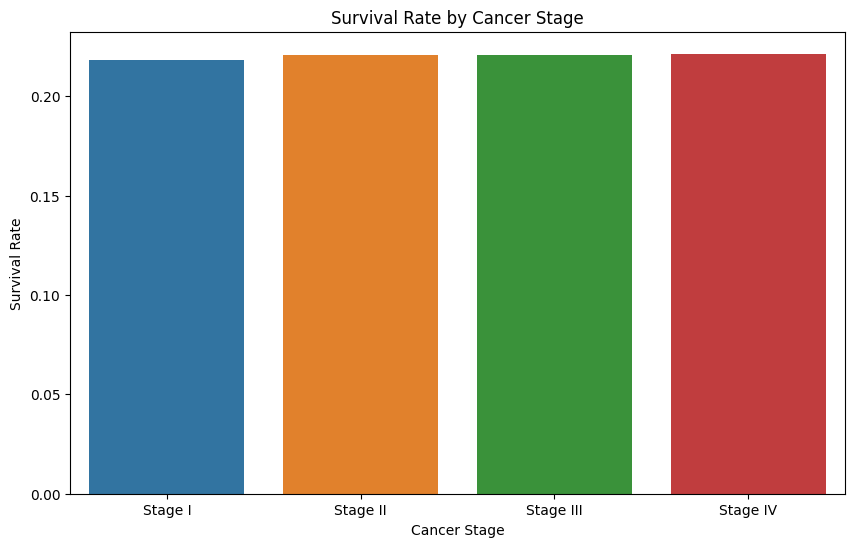

In [9]:
stage_grouped = data.groupby('cancer_stage')['survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='cancer_stage', y='survived', data=stage_grouped)
plt.title('Survival Rate by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Rate')
plt.show()

## Count plot for each cancer stage by country

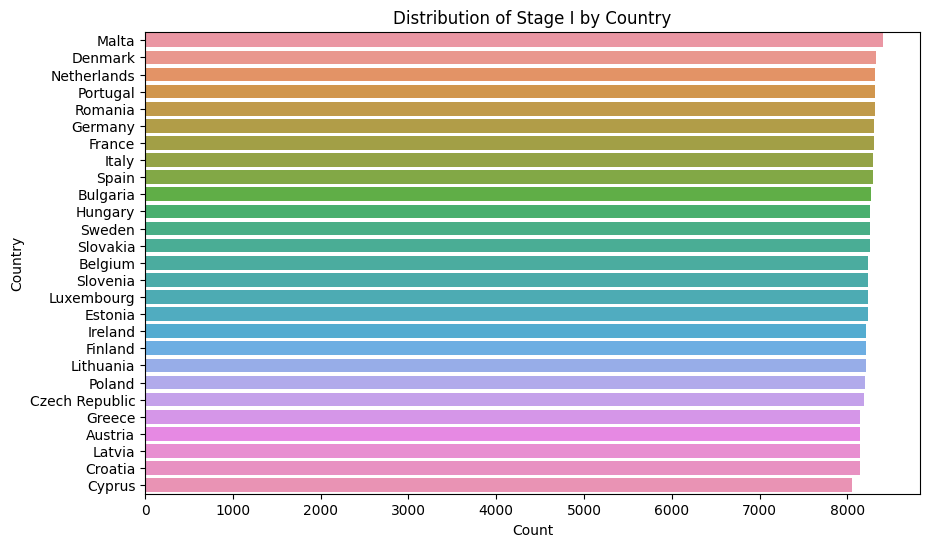

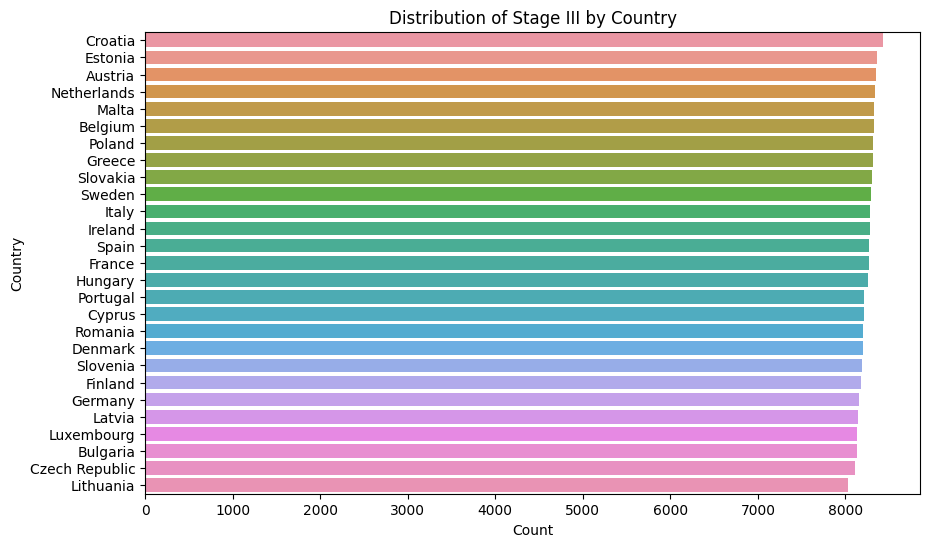

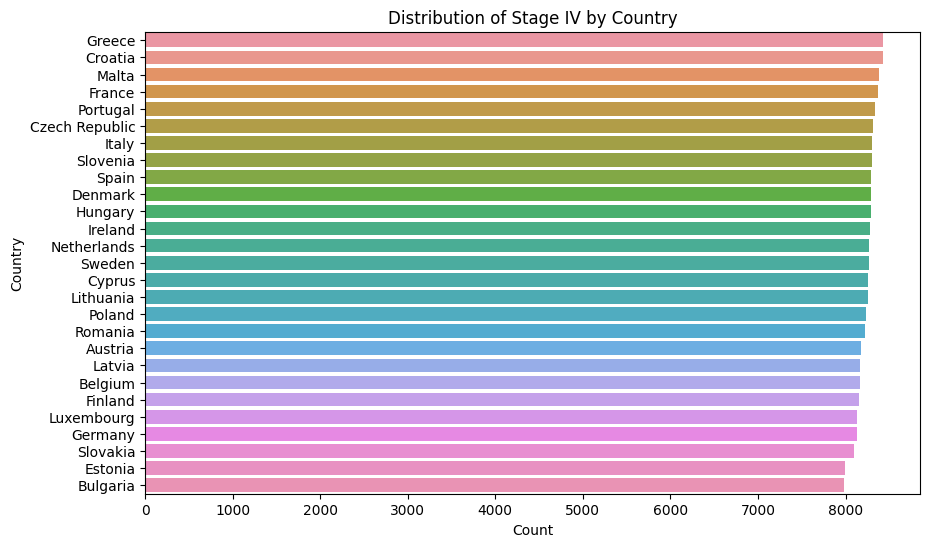

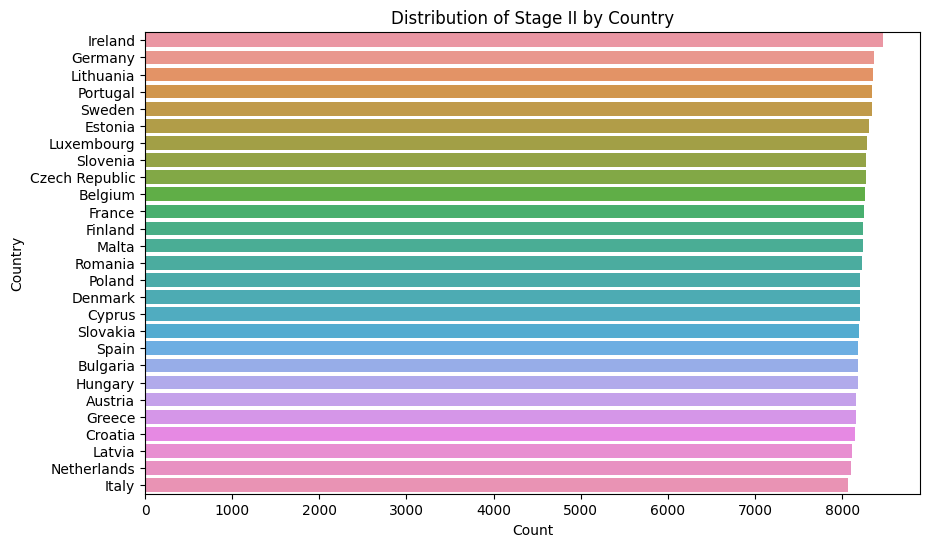

In [10]:
cancer_stages = data['cancer_stage'].unique()
for stage in cancer_stages:
    plt.figure(figsize=(10, 6))
    stage_data = data[data['cancer_stage'] == stage]
    country_counts = stage_data['country'].value_counts()
    sorted_countries = country_counts.index
    sns.countplot(data=stage_data, y='country', order=sorted_countries)
    plt.title(f'Distribution of {stage} by Country')
    plt.xlabel('Count')
    plt.ylabel('Country')
    plt.show()

## Count plot for each treatment type by country

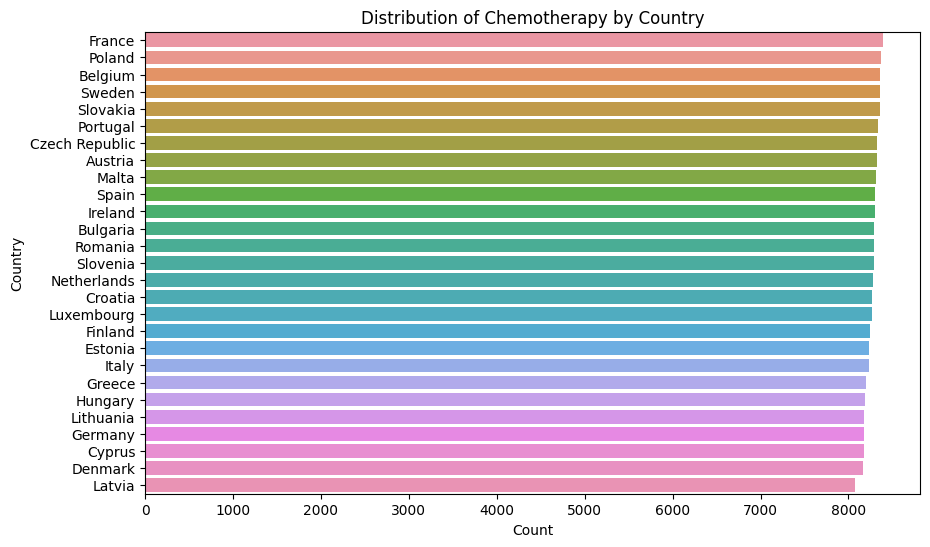

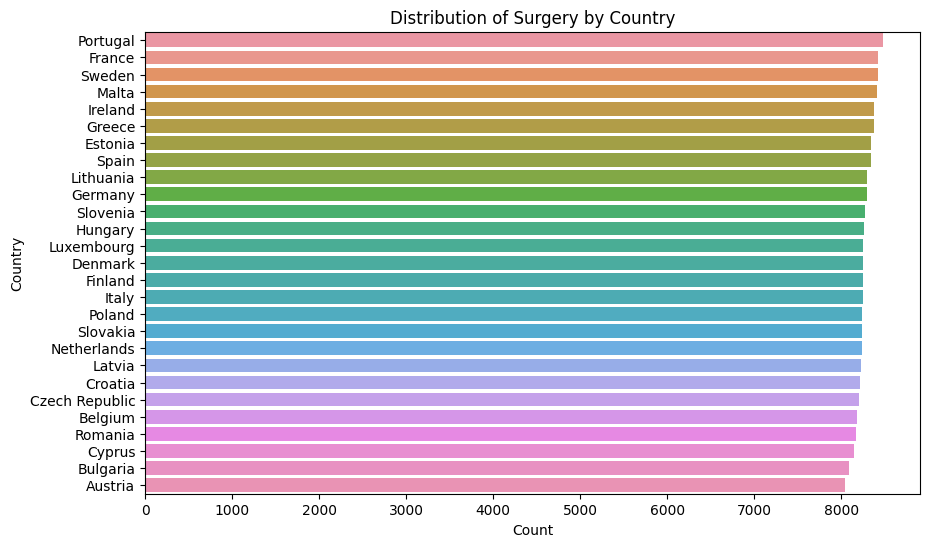

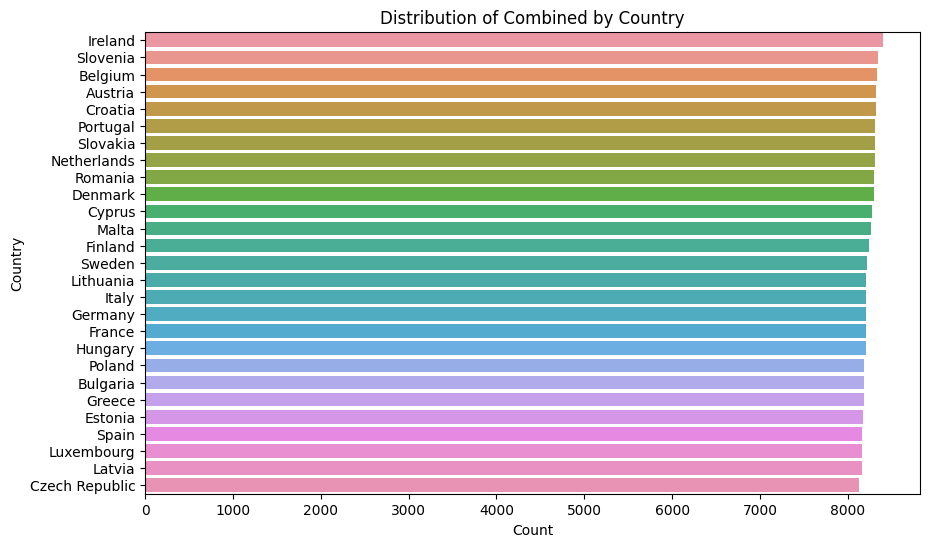

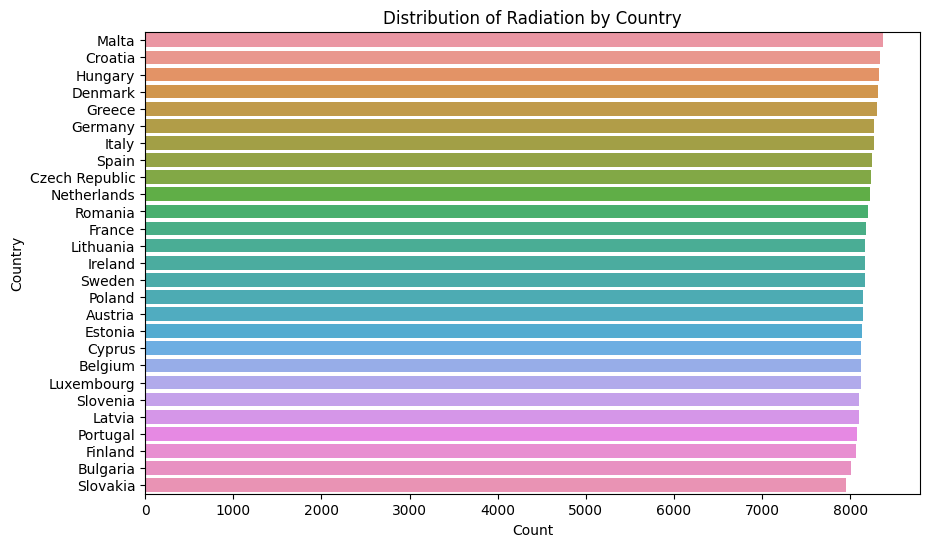

In [11]:
treatment_types = data['treatment_type'].unique()
for treatment in treatment_types:
    plt.figure(figsize=(10, 6))
    treatment_data = data[data['treatment_type'] == treatment]
    country_counts = treatment_data['country'].value_counts()
    sorted_countries = country_counts.index
    sns.countplot(data=treatment_data, y='country', order=sorted_countries)
    plt.title(f'Distribution of {treatment} by Country')
    plt.xlabel('Count')
    plt.ylabel('Country')
    plt.show()